In [1]:
import numpy as np
from numpy import loadtxt
import os
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import pandas as pd
import time
from datetime import datetime


import warnings
warnings.filterwarnings('ignore')

# SEED:
np.random.seed(42)

# DIRECTORY
os.chdir('C:\\Users\\admin\\Desktop\\DS_ML_DL_CODES\\PYTHON')
os.getcwd()

'C:\\Users\\admin\\Desktop\\DS_ML_DL_CODES\\PYTHON'

In [4]:
# agregacja - bagging
# wzmacnianie - boosting
# kontaminacja - stacking
# lasy losowe - random forest

In [3]:
# DATA PREPARATION:
X, y = make_moons(n_samples = 500, noise = 0.30, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# MODELS:
log_clf = LogisticRegression(random_state = 42)
rnd_clf = RandomForestClassifier(random_state = 42)
svm_clf = SVC(random_state = 42)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), 
                  ('rf', rnd_clf), 
                  ('svc', svm_clf)],
    voting='hard') # HARD VOTING - majority votes
voting_clf
voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    


LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


In [4]:
# SOFT VOTING

# DATA PREPARATION:
X, y = make_moons(n_samples = 500, noise = 0.30, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# MODELS:
log_clf = LogisticRegression(random_state = 42)
rnd_clf = RandomForestClassifier(random_state = 42)
svm_clf = SVC(probability = True, random_state = 42)

# METACLASSIFIER:
voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), 
                  ('rf', rnd_clf), 
                  ('svc', svm_clf)],
    voting='soft') # SOFT VOTING - max mean probability
voting_clf
voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    


LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


In [5]:
# BAGGING
# Bagging - with replace
# Pasting - without replace

# DATA PREPARATION:
X, y = make_moons(n_samples = 500, noise = 0.30, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# BAGGING:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state = 42),
    n_estimators = 500,
    max_samples = 100,
    bootstrap = True,
    n_jobs = -1,
    random_state = 42,
    verbose = 1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print("BAGGING:", accuracy_score(y_test, y_pred))

# DECISION TREE:
tree_clf = DecisionTreeClassifier(random_state = 42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("DECISION TREE:", accuracy_score(y_test, y_pred_tree))

# OOB SCORE:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state = 42),
    n_estimators = 500, 
    bootstrap = True, 
    n_jobs = -1, 
    oob_score = True, # Out of bag score
    random_state = 40)
bag_clf.fit(X_train, y_train)
print("Out-of-bag score:", bag_clf.oob_score_) # On out-of training data

y_pred = bag_clf.predict(X_test)
print("Out-of-bag score:", accuracy_score(y_test, y_pred)) # On test data
bag_clf.oob_decision_function_[0:10, :] # probabilities for each observation

# BAGGING DOCUMENTATION:
# BaggingClassifier(base_estimator=None,
#                   n_estimators=10,
#                   max_samples=1.0,
#                   max_features=1.0,
#                   bootstrap=True, 
#                   bootstrap_features=False,
#                   oob_score=False,
#                   warm_start=False, 
#                   n_jobs=None, 
#                   random_state=None,
#                   verbose=0)

# DECISION TREE CLASSIFIER DOCUMENTATION:
# DecisionTreeClassifier(criterion=’gini’, 
#                        splitter=’best’,
#                        max_depth=None, 
#                        min_samples_split=2, 
#                        min_samples_leaf=1,
#                        min_weight_fraction_leaf=0.0,
#                        max_features=None, 
#                        random_state=None,
#                        max_leaf_nodes=None, 
#                        min_impurity_decrease=0.0, 
#                        min_impurity_split=None, 
#                        class_weight=None, 
#                        presort=False)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    1.3s remaining:    9.4s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished


BAGGING: 0.904
DECISION TREE: 0.856
Out-of-bag score: 0.9013333333333333
Out-of-bag score: 0.912


array([[0.31746032, 0.68253968],
       [0.34117647, 0.65882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.08379888, 0.91620112],
       [0.31693989, 0.68306011],
       [0.02923977, 0.97076023],
       [0.97687861, 0.02312139],
       [0.97765363, 0.02234637]])

In [18]:
# RANDOM FORESTS:

# DATA PREPARATION:
X, y = make_moons(n_samples = 500, noise = 0.30, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# RANDOM FOREST:
rnd_clf = RandomForestClassifier(
    n_estimators = 500,
    max_leaf_nodes = 16,
    n_jobs = -1, 
    random_state = 42,
    verbose = 1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
print("RANDOM FOREST:", accuracy_score(y_test, y_pred_rf)) # On test data

# RANDOM FOREST CLASSIFIER DOCUMENTATION:
# RandomForestClassifier(n_estimators=’warn’, 
#                        criterion=’gini’, 
#                        max_depth=None, 
#                        min_samples_split=2,
#                        min_samples_leaf=1, 
#                        min_weight_fraction_leaf=0.0,
#                        max_features=’auto’, 
#                        max_leaf_nodes=None,
#                        min_impurity_decrease=0.0, 
#                        min_impurity_split=None, 
#                        bootstrap=True, 
#                        oob_score=False,
#                        n_jobs=None,
#                        random_state=None, 
#                        verbose=0, 
#                        warm_start=False,
#                        class_weight=None)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.0s finished


RANDOM FOREST: 0.912


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.0s finished


In [15]:
# EXTREMELY RANDOMIZED TREES:

# DATA PREPARATION:
X, y = make_moons(n_samples = 500, noise = 0.30, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# EXTREMELY RANDOMIZED TREES:
ert = ExtraTreesClassifier(
    n_estimators = 1,
    max_leaf_nodes = 16,
    n_jobs = -1, 
    random_state = 42,
    verbose = 1)
ert.fit(X_train, y_train)
y_pred_ert = ert.predict(X_test)
print("EXTREMELY RANDOMIZED TREES:", accuracy_score(y_test, y_pred_ert)) # On test data

# EXTRA TREES CLASSIFIER DOCUMENTATION:
# ExtraTreesClassifier(n_estimators=’warn’,
#                      criterion=’gini’,
#                      max_depth=None,
#                      min_samples_split=2,
#                      min_samples_leaf=1,
#                      min_weight_fraction_leaf=0.0,
#                      max_features=’auto’,
#                      max_leaf_nodes=None,
#                      min_impurity_decrease=0.0,
#                      min_impurity_split=None,
#                      bootstrap=False,
#                      oob_score=False,
#                      n_jobs=None, 
#                      random_state=None, 
#                      verbose=0, 
#                      warm_start=False, 
#                      class_weight=None)

EXTREMELY RANDOMIZED TREES: 0.8


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [8]:
# FEATURE IMPORTANCE:

# DATA PREPARATION:
iris = load_iris()
print(iris["data"][0:10, :])
print(iris["target"][0:10])

rnd_clf = RandomForestClassifier(
    n_estimators = 500,
    n_jobs = -1,
    random_state = 42)
rnd_clf.fit(iris["data"], iris["target"])

for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)    
rnd_clf.feature_importances_

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]
sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

In [14]:
# BOOSTING

# DATA PREPARATION:
X, y = make_moons(n_samples = 500, noise = 0.30, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# ADABOOST:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(
        max_depth = 1),
    n_estimators = 250,
    algorithm = "SAMME.R",
    learning_rate = 0.5,
    random_state = 42)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)
print("ADABOOST:", accuracy_score(y_test, y_pred_ada)) # On test data

# ADABOOST CLASSIFIER DOCUMENTATION:
# AdaBoostClassifier(base_estimator=None,
#                    n_estimators=50,
#                    learning_rate=1.0, 
#                    algorithm=’SAMME.R’, 
#                    random_state=None)

ADABOOST: 0.896


In [13]:
# GRADIENT TREE BOOSTING:

# DATA PREPARATION:
X, y = make_moons(n_samples = 500, noise = 0.30, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# ADABOOST:
gtb_clf = GradientBoostingClassifier(
    max_depth = 1,
    n_estimators = 200,
    learning_rate = 0.9,
    random_state = 42,
verbose = 1)
gtb_clf.fit(X_train, y_train)
y_pred_gtb = gtb_clf.predict(X_test)
print("GRADIENT TREE BOOSTING:", accuracy_score(y_test, y_pred_gtb)) # On test data

# GradientBoostingClassifier(loss=’deviance’, 
#                            learning_rate=0.1, 
#                            n_estimators=100, 
#                            subsample=1.0, 
#                            criterion=’friedman_mse’,
#                            min_samples_split=2,
#                            min_samples_leaf=1, 
#                            min_weight_fraction_leaf=0.0,
#                            max_depth=3,
#                            min_impurity_decrease=0.0,
#                            min_impurity_split=None, 
#                            init=None, 
#                            random_state=None,
#                            max_features=None,
#                            verbose=0,
#                            max_leaf_nodes=None,
#                            warm_start=False,
#                            presort=’auto’,
#                            validation_fraction=0.1,
#                            n_iter_no_change=None,
#                            tol=0.0001)

      Iter       Train Loss   Remaining Time 
         1           0.9539            0.20s
         2           0.7973            0.10s
         3           0.6781            0.07s
         4           0.5848            0.10s
         5           0.5414            0.08s
         6           0.5120            0.06s
         7           0.4927            0.06s
         8           0.4660            0.07s
         9           0.4449            0.06s
        10           0.4227            0.08s
        20           0.3301            0.06s
        30           0.2927            0.05s
        40           0.2743            0.05s
        50           0.2584            0.04s
        60           0.2466            0.04s
        70           0.2372            0.03s
        80           0.2310            0.03s
        90           0.2213            0.03s
       100           0.2141            0.02s
       200           0.1534            0.00s
GRADIENT TREE BOOSTING: 0.888


In [11]:
# NUMBER OF ESTIMATORS OPTIMIZATION:
X, y = make_moons(n_samples = 500, noise = 0.30, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 40)

gtb_clf = GradientBoostingClassifier(
    max_depth = 3,
    n_estimators = 100,
    learning_rate = 0.9,
    random_state = 42)
gtb_clf.fit(X_train, y_train)

errors = [accuracy_score(y_val, y_pred)
          for y_pred in gtb_clf.staged_predict(X_val)]

bst_n_estimators = np.argmin(errors)
print("Optimized number of estimators:", bst_n_estimators)


Optimized number of estimators: 9


In [8]:
# GRID SEARCH WITH CROSS-VALIDATION
X, y = make_moons(n_samples = 500, noise = 0.30, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# MODEL:
rfc = RandomForestClassifier(random_state = 42)
rfc.get_params

# GRID:
param_grid = { 
    'n_estimators': [200, 300, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1, 2, 3, 4],
    'criterion' : ['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator = rfc,
                      param_grid = param_grid,
                      cv = 3,
                      verbose = 2,
                      return_train_score = True)
CV_rfc.fit(X_train, y_train)
CV_rfc

# GridSearchCV(estimator,
#              param_grid,
#              scoring=None,
#              n_jobs=None,
#              iid=’warn’,
#              refit=True,
#              cv=’warn’,
#              verbose=0,
#              pre_dispatch=‘2*n_jobs’, 
#              error_score=’raise-deprecating’,
#              return_train_score=False)

CV_rfc.cv_results_ 
CV_rfc.best_score_ 
CV_rfc.best_params_

# OPTIMIZED VIA HYPERTUNING GRID SEARCH WITH CV MODEL:
best_rfc = RandomForestClassifier(criterion = 'gini',
                                  max_depth = 4,
                                  max_features = 'auto',
                                  n_estimators = 400,
                                  random_state = 42)
best_rfc.fit(X_train, y_train)
y_pred_best_rfc = best_rfc.predict(X_test)
print("RANDOM FOREST GRID SEARCH WITH CROSS-VALIDATION:", accuracy_score(y_test, y_pred_best_rfc)) 

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] criterion=gini, max_depth=1, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=1, max_features=auto, n_estimators=200, total=   0.1s
[CV] criterion=gini, max_depth=1, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=1, max_features=auto, n_estimators=200, total=   0.1s
[CV] criterion=gini, max_depth=1, max_features=auto, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, max_features=auto, n_estimators=200, total=   0.1s
[CV] criterion=gini, max_depth=1, max_features=auto, n_estimators=300 
[CV]  criterion=gini, max_depth=1, max_features=auto, n_estimators=300, total=   0.1s
[CV] criterion=gini, max_depth=1, max_features=auto, n_estimators=300 
[CV]  criterion=gini, max_depth=1, max_features=auto, n_estimators=300, total=   0.1s
[CV] criterion=gini, max_depth=1, max_features=auto, n_estimators=300 
[CV]  criterion=gini, max_depth=1, max_features=auto, n_estimators=300, total=   0.1s
[CV] criterion=gini, max_depth=1, max_features=auto, n_estimators=400 
[CV]  criterion=gini, max_depth=1, max_features=auto, n_estimators=400, total=   0.2s
[CV] criterion=gini, max_depth=1, max_features=auto, n_estimators=400 
[CV]  criterion=gini, max_depth=1, max_features=auto, n_estimators=400, total=   0.2s
[CV] criterion=gini, max_depth=1, max_features=auto, n_estimators=400 
[CV]  criterion=gini, max_depth=1, max_features=auto, n_es

[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=200, total=   0.1s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=300 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=300, total=   0.1s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=300 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=300, total=   0.1s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=300 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=300, total=   0.1s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=400 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=400, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=400 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=400, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=400 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_es

[CV]  criterion=entropy, max_depth=1, max_features=auto, n_estimators=200, total=   0.1s
[CV] criterion=entropy, max_depth=1, max_features=auto, n_estimators=300 
[CV]  criterion=entropy, max_depth=1, max_features=auto, n_estimators=300, total=   0.1s
[CV] criterion=entropy, max_depth=1, max_features=auto, n_estimators=300 
[CV]  criterion=entropy, max_depth=1, max_features=auto, n_estimators=300, total=   0.1s
[CV] criterion=entropy, max_depth=1, max_features=auto, n_estimators=300 
[CV]  criterion=entropy, max_depth=1, max_features=auto, n_estimators=300, total=   0.1s
[CV] criterion=entropy, max_depth=1, max_features=auto, n_estimators=400 
[CV]  criterion=entropy, max_depth=1, max_features=auto, n_estimators=400, total=   0.2s
[CV] criterion=entropy, max_depth=1, max_features=auto, n_estimators=400 
[CV]  criterion=entropy, max_depth=1, max_features=auto, n_estimators=400, total=   0.2s
[CV] criterion=entropy, max_depth=1, max_features=auto, n_estimators=400 
[CV]  criterion=entrop

[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=200, total=   0.1s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=200 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=200, total=   0.1s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=200 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=200, total=   0.1s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=300 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=300, total=   0.1s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=300 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=300, total=   0.1s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=300 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=300, total=   0.1s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=400 
[CV]  criterion=entrop

[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=400, total=   0.2s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=400 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=400, total=   0.2s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=400 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=400, total=   0.2s


[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:   31.3s finished


RANDOM FOREST GRID SEARCH WITH CROSS-VALIDATION: 0.92


In [7]:
# XGBOOST 

# DATA:
dataset = loadtxt('Pima-Indians-Diabetes.csv', delimiter = ",")
dataset

# SPLIT DATA TO X AND Y:
X = dataset[:,0:8]
Y = dataset[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42)

# MODEL
XGBoost_model = XGBClassifier()
XGBoost_model.fit(X_train, y_train)
XGBoost_model

# XGBClassifier(max_depth=3,
#               learning_rate=0.1, 
#               n_estimators=100,
#               verbosity=1, 
#               silent=None,
#               objective='binary:logistic',
#               booster='gbtree',
#               n_jobs=1,
#               nthread=None, 
#               gamma=0, 
#               min_child_weight=1,
#               max_delta_step=0,
#               subsample=1,
#               colsample_bytree=1,
#               colsample_bylevel=1,
#               colsample_bynode=1,
#               reg_alpha=0,
#               reg_lambda=1,
#               scale_pos_weight=1, 
#               base_score=0.5, 
#               random_state=0, 
#               seed=None,
#               missing=None, 
#               **kwargs)

y_pred_XGBoost_model = XGBoost_model.predict(X_test)
print("XGBOOST:", accuracy_score(y_test, y_pred_XGBoost_model)) 

XGBOOST: 0.7447916666666666


In [6]:
# XGBOOST WITH GRID SEARCH AND CROSS-VALIDATION (CLASSIFICATION)
# DATA:
dataset = loadtxt('Pima-Indians-Diabetes.csv', delimiter = ",")
dataset

# SPLIT DATA TO X AND Y:
X = dataset[:,0:8]
Y = dataset[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42)

# MODEL:
XGBoost_model = XGBClassifier()
XGBoost_model.get_params

param_grid = { 
    'n_estimators': [200, 300],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth' : [1, 2, 3, 4]
}

CV_XGBoost_model = GridSearchCV(estimator = XGBoost_model,
                                param_grid = param_grid,
                                cv = 3,
                                verbose = 2)
CV_XGBoost_model.fit(X_train, y_train)
CV_XGBoost_model.best_params_

# BEST MODEL:
XGBoost_model = XGBClassifier(learning_rate = 0.1,
                              max_depth = 1, 
                              n_estimators = 200)
XGBoost_model.fit(X_train, y_train)
XGBoost_model

y_pred_XGBoost_model = XGBoost_model.predict(X_test)
print("XGBOOST:", accuracy_score(y_test, y_pred_XGBoost_model)) 

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] learning_rate=0.1, max_depth=1, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=1, n_estimators=200, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=1, n_estimators=200, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=1, n_estimators=200, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, n_estimators=300 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] . learning_rate=0.1, max_depth=1, n_estimators=300, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=300 ................
[CV] . learning_rate=0.1, max_depth=1, n_estimators=300, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=300 ................
[CV] . learning_rate=0.1, max_depth=1, n_estimators=300, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=2, n_estimators=200, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=2, n_estimators=200, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=2, n_estimators=200, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=300 ................
[CV] . learning_rate=0.1, max_depth=2, n_estimators=300, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=300 ................
[CV] .

[CV] . learning_rate=1.0, max_depth=3, n_estimators=300, total=   0.1s
[CV] learning_rate=1.0, max_depth=3, n_estimators=300 ................
[CV] . learning_rate=1.0, max_depth=3, n_estimators=300, total=   0.1s
[CV] learning_rate=1.0, max_depth=3, n_estimators=300 ................
[CV] . learning_rate=1.0, max_depth=3, n_estimators=300, total=   0.1s
[CV] learning_rate=1.0, max_depth=4, n_estimators=200 ................
[CV] . learning_rate=1.0, max_depth=4, n_estimators=200, total=   0.1s
[CV] learning_rate=1.0, max_depth=4, n_estimators=200 ................
[CV] . learning_rate=1.0, max_depth=4, n_estimators=200, total=   0.1s
[CV] learning_rate=1.0, max_depth=4, n_estimators=200 ................
[CV] . learning_rate=1.0, max_depth=4, n_estimators=200, total=   0.1s
[CV] learning_rate=1.0, max_depth=4, n_estimators=300 ................
[CV] . learning_rate=1.0, max_depth=4, n_estimators=300, total=   0.1s
[CV] learning_rate=1.0, max_depth=4, n_estimators=300 ................
[CV] .

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    6.0s finished


In [9]:
# XGBOOST WITH GPU

# DATA:
boston = load_boston()
X = boston["data"]
Y = boston["target"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42)

XGB_model = xgb.XGBRegressor(silent = True, 
                             n_estimators = 1000,
                             max_depth = 3,
                             learning_rate = 0.1,
                             tree_method = 'gpu_hist' # sth goes wrong and on GPU it is slower than on CPU
                            )
XGB_model.fit(X_train, y_train)
XGB_model

y_pred_XGBoost_model = XGB_model.predict(X_test)
print("XGBOOST with GPU:", mean_squared_error(y_test, y_pred_XGBoost_model)) 

XGBOOST with GPU: 9.03459204324813


In [3]:
# XGBOOST AND GRID SEARCH AND CROSS-VALIDATION (REGRESSION)

# DATA:
boston = load_boston()
X = boston["data"]
Y = boston["target"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42)

# MODEL:
XGB_model = xgb.XGBRegressor(silent = True)
XGB_model.get_params

param_grid = {
    'n_estimators': [200, 300],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth' : [1, 2, 3, 4],
}

CV_XGBOOST = GridSearchCV(estimator = XGB_model,
                          param_grid = param_grid,
                          cv = 3,
                          verbose = 2
                         )
CV_XGBOOST.fit(X_train, y_train)
CV_XGBOOST.best_params_

# BEST MODEL:
XGB_model = xgb.XGBRegressor(silent = True, 
                             n_estimators = 200,
                             max_depth = 4,
                             learning_rate = 0.1)
XGB_model.fit(X_train, y_train)
XGB_model

y_pred_XGBoost_model = XGB_model.predict(X_test)
print("XGBOOST", mean_squared_error(y_test, y_pred_XGBoost_model)) 

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] learning_rate=0.1, max_depth=1, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=1, n_estimators=200, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=1, n_estimators=200, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=1, n_estimators=200, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=300 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] . learning_rate=0.1, max_depth=1, n_estimators=300, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=300 ................
[CV] . learning_rate=0.1, max_depth=1, n_estimators=300, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=300 ................
[CV] . learning_rate=0.1, max_depth=1, n_estimators=300, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=2, n_estimators=200, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=2, n_estimators=200, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=2, n_estimators=200, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=300 ................
[CV] . learning_rate=0.1, max_depth=2, n_estimators=300, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=300 ................
[CV] .

[CV] . learning_rate=1.0, max_depth=3, n_estimators=300, total=   0.1s
[CV] learning_rate=1.0, max_depth=3, n_estimators=300 ................
[CV] . learning_rate=1.0, max_depth=3, n_estimators=300, total=   0.1s
[CV] learning_rate=1.0, max_depth=3, n_estimators=300 ................
[CV] . learning_rate=1.0, max_depth=3, n_estimators=300, total=   0.1s
[CV] learning_rate=1.0, max_depth=4, n_estimators=200 ................
[CV] . learning_rate=1.0, max_depth=4, n_estimators=200, total=   0.1s
[CV] learning_rate=1.0, max_depth=4, n_estimators=200 ................
[CV] . learning_rate=1.0, max_depth=4, n_estimators=200, total=   0.1s
[CV] learning_rate=1.0, max_depth=4, n_estimators=200 ................
[CV] . learning_rate=1.0, max_depth=4, n_estimators=200, total=   0.1s
[CV] learning_rate=1.0, max_depth=4, n_estimators=300 ................
[CV] . learning_rate=1.0, max_depth=4, n_estimators=300, total=   0.1s
[CV] learning_rate=1.0, max_depth=4, n_estimators=300 ................
[CV] .

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    6.1s finished


In [20]:
# XGBOOST TUTORIAL

# DATA:
boston = load_boston()
print(boston.keys())
print(boston.data.shape)
# print(boston.DESCR)
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data.head()
data['PRICE'] = boston.target
data.info()
data.describe()

X, y = data.iloc[:, :-1], data.iloc[:, -1]
data_dmatrix = xgb.DMatrix(data = X, label = y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# MODEL:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 10)

xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

# K-FOLD CROSS-VALIDATION:
params = {
    "objective":"reg:linear",
    'colsample_bytree': 0.3,
    'learning_rate': 0.1,
    'max_depth': 5,
    'alpha': 10
}

cv_results = xgb.cv(dtrain = data_dmatrix,
                    params = params,
                    nfold = 3,
                    num_boost_round = 50, 
                    early_stopping_rounds = 10,
                    metrics = "rmse",
                    as_pandas = True,
                    seed = 123)
cv_results.head()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB
[13:19:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 9.204151
[13:19:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.750758,0.036152,21.765523,0.028849
1,19.778532,0.077649,19.830760,0.031760
2,18.052811,0.118632,18.157337,0.116038
3,16.458958,0.169188,16.623974,0.191414
4,15.074781,0.183545,15.254608,0.213612


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB
[13:24:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


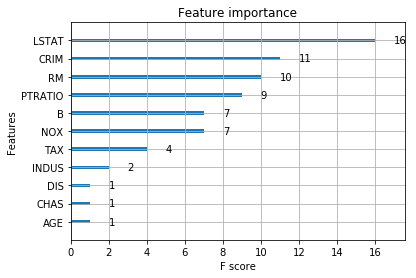

In [24]:
# VISUALIZATION OF BOOSTING TREES AND FEATURE IMPORTANCE:

# DATA:
boston = load_boston()
print(boston.keys())
print(boston.data.shape)
# print(boston.DESCR)
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data.head()
data['PRICE'] = boston.target
data.info()
data.describe()

X, y = data.iloc[:, :-1], data.iloc[:, -1]
data_dmatrix = xgb.DMatrix(data = X, label = y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

xg_reg = xgb.train(params = params, 
                   dtrain = data_dmatrix, 
                   num_boost_round = 10)

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [5]:
# XGBOOST GRID SEARCH (ALL PROCESSORS - FASTER!):
digits = load_digits()
digits
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# GRID SEARCH:
XGB_model = XGBClassifier(silent = True,
                          n_jobs = -1,
                         )
XGB_model.get_params

param_grid = {
    'n_estimators': [200, 300],
    'learning_rate': [0.1, 0.5],
    'max_depth' : [1, 2, 3]
}

CV_XGBOOST = GridSearchCV(estimator = XGB_model,
                          param_grid = param_grid,
                          cv = 3,
                          verbose = 2,
                          n_jobs = -1
                         )
CV_XGBOOST.fit(X_train, y_train)
CV_XGBOOST.best_params_
# {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 200}

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:   10.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   13.3s finished


{'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 200}

In [3]:
# XGBOOST RANDOM SEARCH (all processors):

# DATA:
digits = load_digits()
digits
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

xgb = XGBClassifier(silent = True,
                    n_jobs = -1 # default n_jobs = 1, -1 - all processors (faster)
                   )
xgb.get_params

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.02, 0.05]    
        }

n_iter_search = 2

random_search = RandomizedSearchCV(xgb,
                                   param_distributions = params,
                                   n_iter = n_iter_search,
                                   cv = 3, 
                                   verbose = 2,
                                  random_state = 42,
                                  n_jobs = -1
                                  )
random_search.fit(X_train, y_train)
random_search.cv_results_
random_search.best_params_

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] subsample=0.8, min_child_weight=1, max_depth=5, learning_rate=0.02, gamma=0.5, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.8, min_child_weight=1, max_depth=5, learning_rate=0.02, gamma=0.5, colsample_bytree=1.0, total=   0.7s
[CV] subsample=0.8, min_child_weight=1, max_depth=5, learning_rate=0.02, gamma=0.5, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  subsample=0.8, min_child_weight=1, max_depth=5, learning_rate=0.02, gamma=0.5, colsample_bytree=1.0, total=   0.7s
[CV] subsample=0.8, min_child_weight=1, max_depth=5, learning_rate=0.02, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.8, min_child_weight=1, max_depth=5, learning_rate=0.02, gamma=0.5, colsample_bytree=1.0, total=   0.7s
[CV] subsample=0.8, min_child_weight=1, max_depth=7, learning_rate=0.02, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.8, min_child_weight=1, max_depth=7, learning_rate=0.02, gamma=2, colsample_bytree=1.0, total=   0.8s
[CV] subsample=0.8, min_child_weight=1, max_depth=7, learning_rate=0.02, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.8, min_child_weight=1, max_depth=7, learning_rate=0.02, gamma=2, colsample_bytree=1.0, total=   0.8s
[CV] subsample=0.8, min_child_weight=1, max_depth=7, learning_rate=0.02, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.8, min_child_weight=1, max_depth=7, learning_rate=0.02, gamma=2, colsample_bytree=1.

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.4s finished


{'subsample': 0.8,
 'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.02,
 'gamma': 0.5,
 'colsample_bytree': 1.0}

In [4]:
# CPU & GPU COMPARISON
# GPU works on xgboost API (not scikit learn)

import xgboost as xgb
import numpy as np
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
import time

# Fetch dataset using sklearn
cov = fetch_covtype()
X = cov.data
y = cov.target

# Create 0.75/0.25 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75,
                                                    random_state=42)

# Specify sufficient boosting iterations to reach a minimum
num_round = 3000

# Leave most parameters as default
param = {'objective': 'multi:softmax', # Specify multiclass classification
         'num_class': 8, # Number of possible output classes
         'tree_method': 'gpu_hist' # Use GPU accelerated algorithm
         }

# Convert input data from numpy to XGBoost format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

gpu_res = {} # Store accuracy result
tmp = time.time()
# Train model
xgb.train(param, dtrain, num_round, evals=[(dtest, 'test')], evals_result=gpu_res)
print("GPU Training Time: %s seconds" % (str(time.time() - tmp)))

# Repeat for CPU algorithm
tmp = time.time()
param['tree_method'] = 'hist'
cpu_res = {}
xgb.train(param, dtrain, num_round, evals=[(dtest, 'test')], evals_result=cpu_res)
print("CPU Training Time: %s seconds" % (str(time.time() - tmp)))

# GPU 528
# CPU 2096

[0]	test-merror:0.254804
[1]	test-merror:0.247885
[2]	test-merror:0.244263
[3]	test-merror:0.240683
[4]	test-merror:0.23848
[5]	test-merror:0.234777
[6]	test-merror:0.23216
[7]	test-merror:0.229737
[8]	test-merror:0.227176
[9]	test-merror:0.224636
[10]	test-merror:0.222646
[11]	test-merror:0.220773
[12]	test-merror:0.218453
[13]	test-merror:0.215582
[14]	test-merror:0.214612
[15]	test-merror:0.21223
[16]	test-merror:0.211183
[17]	test-merror:0.209875
[18]	test-merror:0.208629
[19]	test-merror:0.205917
[20]	test-merror:0.204333
[21]	test-merror:0.203727
[22]	test-merror:0.202591
[23]	test-merror:0.201621
[24]	test-merror:0.199817
[25]	test-merror:0.199025
[26]	test-merror:0.198619
[27]	test-merror:0.197566
[28]	test-merror:0.195363
[29]	test-merror:0.194474
[30]	test-merror:0.193669
[31]	test-merror:0.19307
[32]	test-merror:0.191652
[33]	test-merror:0.190199
[34]	test-merror:0.188932
[35]	test-merror:0.188857
[36]	test-merror:0.187714
[37]	test-merror:0.187218
[38]	test-merror:0.186488


[310]	test-merror:0.071895
[311]	test-merror:0.071799
[312]	test-merror:0.071565
[313]	test-merror:0.071558
[314]	test-merror:0.071544
[315]	test-merror:0.0714
[316]	test-merror:0.071372
[317]	test-merror:0.071406
[318]	test-merror:0.071317
[319]	test-merror:0.071221
[320]	test-merror:0.071083
[321]	test-merror:0.070966
[322]	test-merror:0.071028
[323]	test-merror:0.070945
[324]	test-merror:0.070787
[325]	test-merror:0.070628
[326]	test-merror:0.070567
[327]	test-merror:0.070498
[328]	test-merror:0.070332
[329]	test-merror:0.070126
[330]	test-merror:0.069968
[331]	test-merror:0.069968
[332]	test-merror:0.069823
[333]	test-merror:0.069775
[334]	test-merror:0.069754
[335]	test-merror:0.069699
[336]	test-merror:0.069437
[337]	test-merror:0.069183
[338]	test-merror:0.069045
[339]	test-merror:0.068928
[340]	test-merror:0.068715
[341]	test-merror:0.068563
[342]	test-merror:0.068577
[343]	test-merror:0.068377
[344]	test-merror:0.06824
[345]	test-merror:0.068026
[346]	test-merror:0.067916
[347

[615]	test-merror:0.049548
[616]	test-merror:0.049562
[617]	test-merror:0.049534
[618]	test-merror:0.049459
[619]	test-merror:0.049493
[620]	test-merror:0.049479
[621]	test-merror:0.049445
[622]	test-merror:0.049459
[623]	test-merror:0.049348
[624]	test-merror:0.049307
[625]	test-merror:0.049376
[626]	test-merror:0.049314
[627]	test-merror:0.04928
[628]	test-merror:0.04928
[629]	test-merror:0.0493
[630]	test-merror:0.049183
[631]	test-merror:0.049135
[632]	test-merror:0.049135
[633]	test-merror:0.049169
[634]	test-merror:0.049059
[635]	test-merror:0.049039
[636]	test-merror:0.048949
[637]	test-merror:0.048963
[638]	test-merror:0.048846
[639]	test-merror:0.048832
[640]	test-merror:0.048736
[641]	test-merror:0.048708
[642]	test-merror:0.048694
[643]	test-merror:0.048646
[644]	test-merror:0.048584
[645]	test-merror:0.048564
[646]	test-merror:0.048502
[647]	test-merror:0.048495
[648]	test-merror:0.048447
[649]	test-merror:0.048426
[650]	test-merror:0.048364
[651]	test-merror:0.048254
[652]

[920]	test-merror:0.041032
[921]	test-merror:0.040908
[922]	test-merror:0.040922
[923]	test-merror:0.040874
[924]	test-merror:0.040805
[925]	test-merror:0.040812
[926]	test-merror:0.040805
[927]	test-merror:0.040825
[928]	test-merror:0.040784
[929]	test-merror:0.040756
[930]	test-merror:0.04075
[931]	test-merror:0.040729
[932]	test-merror:0.040701
[933]	test-merror:0.040729
[934]	test-merror:0.040681
[935]	test-merror:0.040681
[936]	test-merror:0.04066
[937]	test-merror:0.040681
[938]	test-merror:0.040646
[939]	test-merror:0.040626
[940]	test-merror:0.040584
[941]	test-merror:0.040571
[942]	test-merror:0.040612
[943]	test-merror:0.040639
[944]	test-merror:0.040701
[945]	test-merror:0.040667
[946]	test-merror:0.040577
[947]	test-merror:0.040598
[948]	test-merror:0.040564
[949]	test-merror:0.04046
[950]	test-merror:0.040398
[951]	test-merror:0.040385
[952]	test-merror:0.040378
[953]	test-merror:0.040343
[954]	test-merror:0.040343
[955]	test-merror:0.040357
[956]	test-merror:0.040337
[957

[1217]	test-merror:0.036667
[1218]	test-merror:0.036674
[1219]	test-merror:0.036633
[1220]	test-merror:0.036646
[1221]	test-merror:0.036681
[1222]	test-merror:0.036688
[1223]	test-merror:0.036695
[1224]	test-merror:0.036688
[1225]	test-merror:0.03666
[1226]	test-merror:0.036736
[1227]	test-merror:0.036736
[1228]	test-merror:0.036708
[1229]	test-merror:0.036729
[1230]	test-merror:0.036708
[1231]	test-merror:0.036674
[1232]	test-merror:0.036598
[1233]	test-merror:0.036605
[1234]	test-merror:0.03664
[1235]	test-merror:0.03664
[1236]	test-merror:0.036667
[1237]	test-merror:0.036605
[1238]	test-merror:0.036619
[1239]	test-merror:0.036564
[1240]	test-merror:0.036578
[1241]	test-merror:0.03664
[1242]	test-merror:0.036619
[1243]	test-merror:0.03664
[1244]	test-merror:0.036708
[1245]	test-merror:0.036681
[1246]	test-merror:0.036695
[1247]	test-merror:0.036729
[1248]	test-merror:0.036681
[1249]	test-merror:0.036736
[1250]	test-merror:0.036646
[1251]	test-merror:0.036667
[1252]	test-merror:0.0367

[1512]	test-merror:0.035042
[1513]	test-merror:0.035042
[1514]	test-merror:0.035042
[1515]	test-merror:0.035015
[1516]	test-merror:0.03498
[1517]	test-merror:0.03498
[1518]	test-merror:0.035001
[1519]	test-merror:0.035015
[1520]	test-merror:0.03509
[1521]	test-merror:0.035029
[1522]	test-merror:0.03498
[1523]	test-merror:0.035008
[1524]	test-merror:0.03498
[1525]	test-merror:0.034987
[1526]	test-merror:0.034946
[1527]	test-merror:0.034932
[1528]	test-merror:0.034946
[1529]	test-merror:0.034973
[1530]	test-merror:0.034946
[1531]	test-merror:0.034905
[1532]	test-merror:0.034932
[1533]	test-merror:0.034987
[1534]	test-merror:0.034967
[1535]	test-merror:0.034973
[1536]	test-merror:0.03498
[1537]	test-merror:0.034987
[1538]	test-merror:0.035029
[1539]	test-merror:0.035015
[1540]	test-merror:0.034994
[1541]	test-merror:0.034967
[1542]	test-merror:0.034953
[1543]	test-merror:0.034932
[1544]	test-merror:0.034918
[1545]	test-merror:0.034911
[1546]	test-merror:0.034918
[1547]	test-merror:0.03494

[1806]	test-merror:0.03348
[1807]	test-merror:0.033452
[1808]	test-merror:0.033473
[1809]	test-merror:0.033541
[1810]	test-merror:0.033597
[1811]	test-merror:0.033638
[1812]	test-merror:0.033597
[1813]	test-merror:0.033576
[1814]	test-merror:0.033583
[1815]	test-merror:0.033555
[1816]	test-merror:0.033555
[1817]	test-merror:0.033569
[1818]	test-merror:0.033493
[1819]	test-merror:0.033528
[1820]	test-merror:0.033535
[1821]	test-merror:0.033569
[1822]	test-merror:0.033576
[1823]	test-merror:0.033569
[1824]	test-merror:0.033493
[1825]	test-merror:0.033535
[1826]	test-merror:0.033521
[1827]	test-merror:0.033514
[1828]	test-merror:0.033514
[1829]	test-merror:0.033514
[1830]	test-merror:0.033528
[1831]	test-merror:0.0335
[1832]	test-merror:0.0335
[1833]	test-merror:0.033473
[1834]	test-merror:0.033438
[1835]	test-merror:0.033418
[1836]	test-merror:0.033369
[1837]	test-merror:0.033376
[1838]	test-merror:0.033369
[1839]	test-merror:0.033431
[1840]	test-merror:0.033438
[1841]	test-merror:0.0334

[2100]	test-merror:0.032791
[2101]	test-merror:0.032757
[2102]	test-merror:0.032736
[2103]	test-merror:0.03275
[2104]	test-merror:0.032764
[2105]	test-merror:0.03277
[2106]	test-merror:0.032736
[2107]	test-merror:0.032791
[2108]	test-merror:0.032791
[2109]	test-merror:0.032777
[2110]	test-merror:0.03277
[2111]	test-merror:0.032764
[2112]	test-merror:0.03275
[2113]	test-merror:0.032757
[2114]	test-merror:0.032764
[2115]	test-merror:0.032777
[2116]	test-merror:0.032805
[2117]	test-merror:0.032757
[2118]	test-merror:0.032743
[2119]	test-merror:0.032798
[2120]	test-merror:0.032764
[2121]	test-merror:0.03277
[2122]	test-merror:0.032798
[2123]	test-merror:0.032798
[2124]	test-merror:0.032846
[2125]	test-merror:0.032791
[2126]	test-merror:0.032777
[2127]	test-merror:0.032791
[2128]	test-merror:0.03275
[2129]	test-merror:0.032784
[2130]	test-merror:0.032784
[2131]	test-merror:0.032784
[2132]	test-merror:0.032757
[2133]	test-merror:0.03275
[2134]	test-merror:0.032736
[2135]	test-merror:0.032736

[2395]	test-merror:0.032185
[2396]	test-merror:0.032165
[2397]	test-merror:0.032233
[2398]	test-merror:0.032247
[2399]	test-merror:0.032247
[2400]	test-merror:0.032233
[2401]	test-merror:0.032275
[2402]	test-merror:0.032275
[2403]	test-merror:0.032282
[2404]	test-merror:0.032261
[2405]	test-merror:0.032261
[2406]	test-merror:0.032275
[2407]	test-merror:0.032254
[2408]	test-merror:0.032227
[2409]	test-merror:0.032192
[2410]	test-merror:0.032199
[2411]	test-merror:0.032178
[2412]	test-merror:0.03224
[2413]	test-merror:0.032227
[2414]	test-merror:0.03222
[2415]	test-merror:0.03224
[2416]	test-merror:0.03222
[2417]	test-merror:0.032233
[2418]	test-merror:0.032268
[2419]	test-merror:0.03224
[2420]	test-merror:0.032158
[2421]	test-merror:0.032206
[2422]	test-merror:0.032171
[2423]	test-merror:0.032165
[2424]	test-merror:0.032103
[2425]	test-merror:0.032103
[2426]	test-merror:0.032116
[2427]	test-merror:0.032158
[2428]	test-merror:0.032165
[2429]	test-merror:0.032144
[2430]	test-merror:0.0321

[2690]	test-merror:0.03171
[2691]	test-merror:0.031703
[2692]	test-merror:0.031751
[2693]	test-merror:0.031745
[2694]	test-merror:0.031758
[2695]	test-merror:0.03171
[2696]	test-merror:0.031724
[2697]	test-merror:0.031703
[2698]	test-merror:0.031731
[2699]	test-merror:0.031724
[2700]	test-merror:0.031703
[2701]	test-merror:0.03171
[2702]	test-merror:0.031724
[2703]	test-merror:0.031745
[2704]	test-merror:0.031751
[2705]	test-merror:0.031745
[2706]	test-merror:0.031731
[2707]	test-merror:0.031738
[2708]	test-merror:0.031751
[2709]	test-merror:0.031779
[2710]	test-merror:0.031745
[2711]	test-merror:0.031745
[2712]	test-merror:0.031751
[2713]	test-merror:0.031731
[2714]	test-merror:0.031724
[2715]	test-merror:0.031676
[2716]	test-merror:0.031717
[2717]	test-merror:0.031745
[2718]	test-merror:0.031696
[2719]	test-merror:0.03171
[2720]	test-merror:0.031731
[2721]	test-merror:0.031724
[2722]	test-merror:0.031703
[2723]	test-merror:0.03171
[2724]	test-merror:0.031696
[2725]	test-merror:0.0316

[2984]	test-merror:0.031352
[2985]	test-merror:0.031366
[2986]	test-merror:0.031387
[2987]	test-merror:0.03138
[2988]	test-merror:0.031359
[2989]	test-merror:0.031352
[2990]	test-merror:0.031352
[2991]	test-merror:0.031373
[2992]	test-merror:0.031373
[2993]	test-merror:0.031366
[2994]	test-merror:0.031387
[2995]	test-merror:0.031387
[2996]	test-merror:0.031407
[2997]	test-merror:0.031414
[2998]	test-merror:0.031387
[2999]	test-merror:0.031359
GPU Training Time: 528.2269818782806 seconds
[0]	test-merror:0.254831
[1]	test-merror:0.247912
[2]	test-merror:0.244298
[3]	test-merror:0.24069
[4]	test-merror:0.238536
[5]	test-merror:0.234804
[6]	test-merror:0.232229
[7]	test-merror:0.229703
[8]	test-merror:0.227162
[9]	test-merror:0.224519
[10]	test-merror:0.222784
[11]	test-merror:0.220705
[12]	test-merror:0.21844
[13]	test-merror:0.21676
[14]	test-merror:0.214736
[15]	test-merror:0.212257
[16]	test-merror:0.210206
[17]	test-merror:0.209345
[18]	test-merror:0.207617
[19]	test-merror:0.206102
[

[291]	test-merror:0.073919
[292]	test-merror:0.073492
[293]	test-merror:0.073313
[294]	test-merror:0.073231
[295]	test-merror:0.073148
[296]	test-merror:0.0731
[297]	test-merror:0.072921
[298]	test-merror:0.072749
[299]	test-merror:0.072591
[300]	test-merror:0.072453
[301]	test-merror:0.072405
[302]	test-merror:0.072301
[303]	test-merror:0.072047
[304]	test-merror:0.07195
[305]	test-merror:0.071751
[306]	test-merror:0.071744
[307]	test-merror:0.071702
[308]	test-merror:0.071696
[309]	test-merror:0.071702
[310]	test-merror:0.071544
[311]	test-merror:0.071427
[312]	test-merror:0.071413
[313]	test-merror:0.07142
[314]	test-merror:0.071413
[315]	test-merror:0.0712
[316]	test-merror:0.071097
[317]	test-merror:0.070842
[318]	test-merror:0.07069
[319]	test-merror:0.070429
[320]	test-merror:0.070229
[321]	test-merror:0.070257
[322]	test-merror:0.070071
[323]	test-merror:0.069947
[324]	test-merror:0.069864
[325]	test-merror:0.069616
[326]	test-merror:0.06963
[327]	test-merror:0.069458
[328]	tes

[596]	test-merror:0.049782
[597]	test-merror:0.04972
[598]	test-merror:0.049624
[599]	test-merror:0.0495
[600]	test-merror:0.0495
[601]	test-merror:0.049459
[602]	test-merror:0.049493
[603]	test-merror:0.049445
[604]	test-merror:0.049321
[605]	test-merror:0.049286
[606]	test-merror:0.0493
[607]	test-merror:0.049266
[608]	test-merror:0.049286
[609]	test-merror:0.049335
[610]	test-merror:0.049335
[611]	test-merror:0.049149
[612]	test-merror:0.049059
[613]	test-merror:0.049059
[614]	test-merror:0.049045
[615]	test-merror:0.049032
[616]	test-merror:0.049052
[617]	test-merror:0.049011
[618]	test-merror:0.048997
[619]	test-merror:0.048983
[620]	test-merror:0.048949
[621]	test-merror:0.04888
[622]	test-merror:0.048853
[623]	test-merror:0.048825
[624]	test-merror:0.04877
[625]	test-merror:0.048791
[626]	test-merror:0.048791
[627]	test-merror:0.04877
[628]	test-merror:0.048763
[629]	test-merror:0.048756
[630]	test-merror:0.048784
[631]	test-merror:0.048729
[632]	test-merror:0.048736
[633]	test-

[901]	test-merror:0.041321
[902]	test-merror:0.041342
[903]	test-merror:0.041397
[904]	test-merror:0.041383
[905]	test-merror:0.041355
[906]	test-merror:0.041383
[907]	test-merror:0.041376
[908]	test-merror:0.041355
[909]	test-merror:0.041293
[910]	test-merror:0.041335
[911]	test-merror:0.04128
[912]	test-merror:0.041232
[913]	test-merror:0.041238
[914]	test-merror:0.041225
[915]	test-merror:0.041211
[916]	test-merror:0.041183
[917]	test-merror:0.041163
[918]	test-merror:0.041149
[919]	test-merror:0.041101
[920]	test-merror:0.041156
[921]	test-merror:0.041142
[922]	test-merror:0.041066
[923]	test-merror:0.041114
[924]	test-merror:0.041101
[925]	test-merror:0.040915
[926]	test-merror:0.040915
[927]	test-merror:0.040956
[928]	test-merror:0.041011
[929]	test-merror:0.040963
[930]	test-merror:0.040984
[931]	test-merror:0.040874
[932]	test-merror:0.040846
[933]	test-merror:0.040867
[934]	test-merror:0.040887
[935]	test-merror:0.040791
[936]	test-merror:0.040791
[937]	test-merror:0.040667
[9

[1199]	test-merror:0.037011
[1200]	test-merror:0.037039
[1201]	test-merror:0.036984
[1202]	test-merror:0.036936
[1203]	test-merror:0.036963
[1204]	test-merror:0.036915
[1205]	test-merror:0.036915
[1206]	test-merror:0.036936
[1207]	test-merror:0.036963
[1208]	test-merror:0.036998
[1209]	test-merror:0.036942
[1210]	test-merror:0.036901
[1211]	test-merror:0.036874
[1212]	test-merror:0.036874
[1213]	test-merror:0.036867
[1214]	test-merror:0.036867
[1215]	test-merror:0.036853
[1216]	test-merror:0.036839
[1217]	test-merror:0.036812
[1218]	test-merror:0.036887
[1219]	test-merror:0.036846
[1220]	test-merror:0.03675
[1221]	test-merror:0.036757
[1222]	test-merror:0.03666
[1223]	test-merror:0.03666
[1224]	test-merror:0.036626
[1225]	test-merror:0.03664
[1226]	test-merror:0.03666
[1227]	test-merror:0.03664
[1228]	test-merror:0.03666
[1229]	test-merror:0.036619
[1230]	test-merror:0.036605
[1231]	test-merror:0.036612
[1232]	test-merror:0.036571
[1233]	test-merror:0.036571
[1234]	test-merror:0.036536

[1493]	test-merror:0.034691
[1494]	test-merror:0.034746
[1495]	test-merror:0.034719
[1496]	test-merror:0.034712
[1497]	test-merror:0.034705
[1498]	test-merror:0.034774
[1499]	test-merror:0.034753
[1500]	test-merror:0.034794
[1501]	test-merror:0.034808
[1502]	test-merror:0.034794
[1503]	test-merror:0.034774
[1504]	test-merror:0.034753
[1505]	test-merror:0.03476
[1506]	test-merror:0.034739
[1507]	test-merror:0.034698
[1508]	test-merror:0.034705
[1509]	test-merror:0.034726
[1510]	test-merror:0.034705
[1511]	test-merror:0.034684
[1512]	test-merror:0.034643
[1513]	test-merror:0.034677
[1514]	test-merror:0.034698
[1515]	test-merror:0.034677
[1516]	test-merror:0.034664
[1517]	test-merror:0.034657
[1518]	test-merror:0.034609
[1519]	test-merror:0.034636
[1520]	test-merror:0.034622
[1521]	test-merror:0.034602
[1522]	test-merror:0.034622
[1523]	test-merror:0.034574
[1524]	test-merror:0.034526
[1525]	test-merror:0.034478
[1526]	test-merror:0.034498
[1527]	test-merror:0.034457
[1528]	test-merror:0.

[1787]	test-merror:0.033734
[1788]	test-merror:0.033796
[1789]	test-merror:0.033769
[1790]	test-merror:0.033769
[1791]	test-merror:0.033762
[1792]	test-merror:0.033748
[1793]	test-merror:0.033762
[1794]	test-merror:0.033796
[1795]	test-merror:0.033782
[1796]	test-merror:0.033755
[1797]	test-merror:0.033727
[1798]	test-merror:0.033727
[1799]	test-merror:0.033672
[1800]	test-merror:0.033624
[1801]	test-merror:0.033672
[1802]	test-merror:0.033645
[1803]	test-merror:0.033672
[1804]	test-merror:0.033659
[1805]	test-merror:0.033645
[1806]	test-merror:0.033603
[1807]	test-merror:0.033624
[1808]	test-merror:0.033597
[1809]	test-merror:0.03361
[1810]	test-merror:0.033617
[1811]	test-merror:0.033638
[1812]	test-merror:0.033652
[1813]	test-merror:0.033638
[1814]	test-merror:0.033645
[1815]	test-merror:0.033659
[1816]	test-merror:0.033679
[1817]	test-merror:0.033645
[1818]	test-merror:0.033617
[1819]	test-merror:0.033631
[1820]	test-merror:0.033597
[1821]	test-merror:0.033617
[1822]	test-merror:0.

[2081]	test-merror:0.033004
[2082]	test-merror:0.032984
[2083]	test-merror:0.032949
[2084]	test-merror:0.032936
[2085]	test-merror:0.032963
[2086]	test-merror:0.032998
[2087]	test-merror:0.03297
[2088]	test-merror:0.03297
[2089]	test-merror:0.032949
[2090]	test-merror:0.032963
[2091]	test-merror:0.032977
[2092]	test-merror:0.033025
[2093]	test-merror:0.033011
[2094]	test-merror:0.032998
[2095]	test-merror:0.033018
[2096]	test-merror:0.033025
[2097]	test-merror:0.033004
[2098]	test-merror:0.032984
[2099]	test-merror:0.032984
[2100]	test-merror:0.032984
[2101]	test-merror:0.032984
[2102]	test-merror:0.032991
[2103]	test-merror:0.032984
[2104]	test-merror:0.032922
[2105]	test-merror:0.032922
[2106]	test-merror:0.032894
[2107]	test-merror:0.032908
[2108]	test-merror:0.032881
[2109]	test-merror:0.032874
[2110]	test-merror:0.032915
[2111]	test-merror:0.032963
[2112]	test-merror:0.032949
[2113]	test-merror:0.032901
[2114]	test-merror:0.032887
[2115]	test-merror:0.03286
[2116]	test-merror:0.03

[2375]	test-merror:0.032247
[2376]	test-merror:0.032268
[2377]	test-merror:0.032275
[2378]	test-merror:0.032268
[2379]	test-merror:0.032227
[2380]	test-merror:0.032206
[2381]	test-merror:0.032206
[2382]	test-merror:0.032192
[2383]	test-merror:0.032185
[2384]	test-merror:0.032165
[2385]	test-merror:0.032178
[2386]	test-merror:0.032185
[2387]	test-merror:0.032144
[2388]	test-merror:0.032123
[2389]	test-merror:0.032109
[2390]	test-merror:0.03213
[2391]	test-merror:0.03202
[2392]	test-merror:0.031999
[2393]	test-merror:0.032048
[2394]	test-merror:0.032027
[2395]	test-merror:0.032027
[2396]	test-merror:0.032054
[2397]	test-merror:0.032068
[2398]	test-merror:0.032075
[2399]	test-merror:0.032075
[2400]	test-merror:0.032054
[2401]	test-merror:0.031979
[2402]	test-merror:0.032006
[2403]	test-merror:0.032034
[2404]	test-merror:0.032041
[2405]	test-merror:0.032048
[2406]	test-merror:0.032041
[2407]	test-merror:0.032048
[2408]	test-merror:0.032075
[2409]	test-merror:0.032054
[2410]	test-merror:0.0

[2669]	test-merror:0.03182
[2670]	test-merror:0.031786
[2671]	test-merror:0.031779
[2672]	test-merror:0.031813
[2673]	test-merror:0.03182
[2674]	test-merror:0.031827
[2675]	test-merror:0.031841
[2676]	test-merror:0.03182
[2677]	test-merror:0.031827
[2678]	test-merror:0.031848
[2679]	test-merror:0.0318
[2680]	test-merror:0.03182
[2681]	test-merror:0.03182
[2682]	test-merror:0.031827
[2683]	test-merror:0.031834
[2684]	test-merror:0.031834
[2685]	test-merror:0.031807
[2686]	test-merror:0.031779
[2687]	test-merror:0.031813
[2688]	test-merror:0.031848
[2689]	test-merror:0.031807
[2690]	test-merror:0.031786
[2691]	test-merror:0.031827
[2692]	test-merror:0.031869
[2693]	test-merror:0.031848
[2694]	test-merror:0.031834
[2695]	test-merror:0.031807
[2696]	test-merror:0.031807
[2697]	test-merror:0.0318
[2698]	test-merror:0.031807
[2699]	test-merror:0.031807
[2700]	test-merror:0.031793
[2701]	test-merror:0.031813
[2702]	test-merror:0.031855
[2703]	test-merror:0.031848
[2704]	test-merror:0.031862
[

[2964]	test-merror:0.031655
[2965]	test-merror:0.031621
[2966]	test-merror:0.031614
[2967]	test-merror:0.031628
[2968]	test-merror:0.031648
[2969]	test-merror:0.031676
[2970]	test-merror:0.031676
[2971]	test-merror:0.03171
[2972]	test-merror:0.031683
[2973]	test-merror:0.031634
[2974]	test-merror:0.031648
[2975]	test-merror:0.031641
[2976]	test-merror:0.031634
[2977]	test-merror:0.031607
[2978]	test-merror:0.031648
[2979]	test-merror:0.031676
[2980]	test-merror:0.03169
[2981]	test-merror:0.031703
[2982]	test-merror:0.031717
[2983]	test-merror:0.031724
[2984]	test-merror:0.031696
[2985]	test-merror:0.031703
[2986]	test-merror:0.031696
[2987]	test-merror:0.03169
[2988]	test-merror:0.031676
[2989]	test-merror:0.031696
[2990]	test-merror:0.03169
[2991]	test-merror:0.031676
[2992]	test-merror:0.031683
[2993]	test-merror:0.031683
[2994]	test-merror:0.031648
[2995]	test-merror:0.031648
[2996]	test-merror:0.031641
[2997]	test-merror:0.031655
[2998]	test-merror:0.031634
[2999]	test-merror:0.031